# Proyek Analisis Data: Nama dataset
- Nama: Nafiatul Risa
- Email: risar698@gmail.com
- Id Dicoding: risa2912

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
: Bagaimana Performa bike sharing pada tiap musim?
- Pertanyaan 2
: Bagaimana performa tipe konsumen pada bike sharing berdasarkan hari?
- Pertanyaan 3 
: Bagaimana performa bike sharing tiap bulan?
- Pertanyaan 4 
: Bagaimana performa bike sharing berdasarkan cuaca?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Data Understanding:

    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Assessing Data

#### Day Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Hour Data

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Summary:

**Tipe data**|**Missing value**|**Duplicate data**|**Inaccurate value**
:-----:|:-----:|:-----:|:-----:
day\_df|Terdapat kesalahan tipe data untuk kolom dteday|Tidak Ada|Tidak Ada|Tidak Ada
hour\_df|Terdapat kesalahan tipe data untuk kolom dteday|Tidak Ada|Tidak Ada|Tidak Ada

Bike sharing dataset bersih dari duplicate data. 
Namun saya akan mengganti isi data dari kolom dibawah ini untuk memudahkan dalam exploratory data analysis:

	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
    - workingday : (1:'working_day',0:'holiday')
    - weathersit : (1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain')
    - mnth : (1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec')
    - weekday : (0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun')
    
Kolom holiday tidak diperlukan, karena sudah ada kolom workingday yang juga berisi identifikasi dari holiday. Maka dari itu kolom holiday akan dihapus.

### Cleaning Data

#### Day Data

**Mengubah nama kolom untuk memudahkan dalam membaca data**

In [12]:
day_df.rename(columns={'yr': 'year', 'mnth': 'month', 'weathersit': 'weather_situation',
                       'atemp': 'temp_feel', 'hum': 'humidity', 'cnt': 'Total'}, inplace=True)

**Menghapus kolom holiday dan instant**

In [13]:
day_df.drop(['holiday','instant'], axis=1, inplace=True)

**Mengubah tipe data kolom dteday dari object ke datetime**

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             731 non-null    datetime64[ns]
 1   season             731 non-null    int64         
 2   year               731 non-null    int64         
 3   month              731 non-null    int64         
 4   weekday            731 non-null    int64         
 5   workingday         731 non-null    int64         
 6   weather_situation  731 non-null    int64         
 7   temp               731 non-null    float64       
 8   temp_feel          731 non-null    float64       
 9   humidity           731 non-null    float64       
 10  windspeed          731 non-null    float64       
 11  casual             731 non-null    int64         
 12  registered         731 non-null    int64         
 13  Total              731 non-null    int64         
dtypes: datetim

**Mengubah kolom season (1:springer, 2:summer, 3:fall, 4:winter)**

In [16]:
def change_season(x):
    if x == 1:
        return 'Springer'
    elif x == 2:
        return 'Summer'
    elif x == 3:
        return 'Fall'
    else:
        return 'Winter'


day_df['season'] = day_df['season'].apply(change_season)
day_df.sample(5)

,dteday,season,year,month,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,Total
137,2011-05-18,Summer,0,5,3,1,2,0.550000,0.527158,0.870000,0.201492,536,3319,3855
207,2011-07-27,Fall,0,7,3,1,1,0.775000,0.690667,0.402917,0.183463,755,3901,4656
121,2011-05-02,Summer,0,5,1,1,2,0.549167,0.532833,0.730000,0.183454,847,3554,4401
619,2012-09-11,Fall,1,9,2,1,1,0.577500,0.554292,0.520000,0.092054,1070,6697,7767
352,2011-12-19,Winter,0,12,1,1,1,0.276667,0.280933,0.637500,0.172896,260,3143,3403


**Mengubah kolom year (0: 2011, 1:2012)**

In [17]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012


day_df['year'] = day_df['year'].apply(change_year)
day_df.sample(5)

,dteday,season,year,month,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,Total
386,2012-01-22,Springer,2012,1,0,0,2,0.162500,0.162250,0.796250,0.199638,196,1781,1977
565,2012-07-19,Fall,2012,7,4,1,1,0.770000,0.714642,0.600417,0.165429,888,5703,6591
394,2012-01-30,Springer,2012,1,1,1,1,0.269167,0.262625,0.400833,0.215792,126,3498,3624
527,2012-06-11,Summer,2012,6,1,1,2,0.720833,0.659721,0.587917,0.207713,1017,5647,6664
357,2011-12-24,Springer,2011,12,6,0,1,0.302500,0.299242,0.542500,0.190304,155,856,1011


**Mengubah kolom working day**

In [18]:
def change_wd(x):
    if x == 0:
        return 'Holiday'
    else:
        return 'Working Day'


day_df['workingday'] = day_df['workingday'].apply(change_wd)
day_df.sample(5)

,dteday,season,year,month,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,Total
497,2012-05-12,Summer,2012,5,6,Holiday,1,0.564167,0.544817,0.480417,0.123133,2622,4807,7429
42,2011-02-12,Springer,2011,2,6,Holiday,1,0.222500,0.232954,0.544167,0.203367,288,1184,1472
379,2012-01-15,Springer,2012,1,0,Holiday,1,0.166667,0.161625,0.419167,0.251258,284,2027,2311
72,2011-03-14,Springer,2011,3,1,Working Day,1,0.325217,0.332000,0.496957,0.136926,359,1687,2046
433,2012-03-09,Springer,2012,3,5,Working Day,2,0.410833,0.397083,0.407083,0.414800,447,4122,4569


**Mengubah kolom weater_situation**

In [19]:
def change_ws(x):
    if x == 1:
        return 'Clear'
    elif x == 2:
        return 'Mist'
    elif x == 3:
        return 'Light Snow'
    else:
        return 'Heavy Rain'


day_df['weather_situation'] = day_df['weather_situation'].apply(change_ws)
day_df.sample(5)

,dteday,season,year,month,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,Total
500,2012-05-15,Summer,2012,5,2,Working Day,Mist,0.611667,0.576404,0.794583,0.147392,625,4490,5115
155,2011-06-05,Summer,2011,6,0,Holiday,Mist,0.648333,0.616804,0.652500,0.138692,1685,3221,4906
619,2012-09-11,Fall,2012,9,2,Working Day,Clear,0.577500,0.554292,0.520000,0.092054,1070,6697,7767
647,2012-10-09,Winter,2012,10,2,Working Day,Mist,0.446667,0.438112,0.761667,0.190300,601,5791,6392
380,2012-01-16,Springer,2012,1,1,Holiday,Clear,0.190000,0.190663,0.522500,0.231358,217,2081,2298


**Mengubah kolom month**

In [20]:
month_change = {1: 'January', 2: 'February', 3: 'March',
                4:'April',5:'May',6:'June',7:'July',
                8:'August',9:'September',10:'October',11:'November',12:'December'}
day_df['month'] = day_df['month'].map(month_change)

day_df.sample(5)

,dteday,season,year,month,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,Total
380,2012-01-16,Springer,2012,January,1,Holiday,Clear,0.190000,0.190663,0.522500,0.231358,217,2081,2298
681,2012-11-12,Winter,2012,November,1,Holiday,Clear,0.485000,0.475383,0.741667,0.173517,1097,5172,6269
243,2011-09-01,Fall,2011,September,4,Working Day,Clear,0.655000,0.614921,0.639167,0.141796,783,4332,5115
36,2011-02-06,Springer,2011,February,0,Holiday,Clear,0.285833,0.291671,0.568333,0.141800,354,1269,1623
48,2011-02-18,Springer,2011,February,5,Working Day,Clear,0.521667,0.511983,0.516667,0.264925,579,2348,2927


**Mengubah kolom weekday**

In [21]:
weekday_change = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
                  3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
day_df['weekday'] = day_df['weekday'].map(weekday_change)

day_df.sample(5)

,dteday,season,year,month,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,Total
718,2012-12-19,Winter,2012,December,Thursday,Working Day,Clear,0.332500,0.342162,0.625417,0.184092,333,4934,5267
314,2011-11-11,Winter,2011,November,Saturday,Holiday,Clear,0.324167,0.306817,0.446250,0.314675,440,2928,3368
423,2012-02-28,Springer,2012,February,Wednesday,Working Day,Clear,0.359167,0.353525,0.395833,0.193417,229,4134,4363
13,2011-01-14,Springer,2011,January,Saturday,Working Day,Clear,0.160870,0.188413,0.537826,0.126548,54,1367,1421
587,2012-08-10,Fall,2012,August,Saturday,Working Day,Mist,0.715833,0.667942,0.715833,0.238813,1065,4721,5786


#### Hour Data

**Mengubah nama kolom untuk memudahkan dalam membaca data**

In [22]:
hour_df.rename(columns={'yr': 'year', 'mnth': 'month', 'hr':'hour', 'weathersit': 'weather_situation',
                       'atemp': 'temp_feel', 'hum': 'humidity', 'cnt': 'Total'}, inplace=True)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   workingday         17379 non-null  int64  
 9   weather_situation  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  temp_feel          17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  Total              173

**Menghapus kolom holiday**

In [23]:
hour_df.drop(['holiday'], axis=1, inplace=True)

**Mengubah tipe data kolom dteday dari object ke datetime**

In [24]:
for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [25]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   dteday             17379 non-null  datetime64[ns]
 2   season             17379 non-null  int64         
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   weekday            17379 non-null  int64         
 7   workingday         17379 non-null  int64         
 8   weather_situation  17379 non-null  int64         
 9   temp               17379 non-null  float64       
 10  temp_feel          17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  windspeed          17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

**Mengubah kolom season (1:springer, 2:summer, 3:fall, 4:winter)**

In [26]:
hour_df['season'] = hour_df['season'].apply(change_season)

hour_df.sample(5)

,instant,dteday,season,year,month,hour,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,Total
1174,1175,2011-02-21,Springer,0,2,17,1,0,2,0.28,0.2576,0.75,0.3881,18,62,80
16366,16367,2012-11-19,Winter,1,11,16,1,1,1,0.42,0.4242,0.58,0.2537,55,325,380
16673,16674,2012-12-02,Winter,1,12,12,0,0,2,0.34,0.3333,0.81,0.1642,111,409,520
12090,12091,2012-05-23,Summer,1,5,23,3,1,1,0.60,0.5606,0.83,0.1343,23,83,106
15369,15370,2012-10-07,Winter,1,10,14,0,0,2,0.44,0.4394,0.67,0.0000,71,243,314


**Mengubah kolom year (0: 2011, 1:2012)**

In [27]:
hour_df['year'] = hour_df['year'].apply(change_year)

hour_df.sample(5)

,instant,dteday,season,year,month,hour,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,Total
3355,3356,2011-05-24,Summer,2011,5,17,2,1,1,0.70,0.6515,0.61,0.1045,56,492,548
1959,1960,2011-03-27,Summer,2011,3,11,0,0,2,0.24,0.2424,0.48,0.1642,23,85,108
10376,10377,2012-03-13,Springer,2012,3,11,2,1,1,0.54,0.5152,0.73,0.2836,64,155,219
12984,12985,2012-06-30,Fall,2012,6,5,6,0,1,0.64,0.5758,0.89,0.1642,3,7,10
8334,8335,2011-12-18,Winter,2011,12,22,0,0,1,0.22,0.2273,0.75,0.1940,2,47,49


**Mengubah kolom working day**

In [28]:
hour_df['workingday'] = hour_df['workingday'].apply(change_wd)

hour_df.sample(5)

,instant,dteday,season,year,month,hour,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,Total
14858,14859,2012-09-16,Fall,2012,9,7,0,Holiday,1,0.50,0.4848,0.77,0.1045,28,43,71
6339,6340,2011-09-26,Winter,2011,9,17,1,Working Day,1,0.70,0.6515,0.70,0.1343,61,509,570
768,769,2011-02-04,Springer,2011,2,11,5,Working Day,1,0.22,0.2273,0.51,0.1642,3,61,64
12140,12141,2012-05-26,Summer,2012,5,1,6,Holiday,1,0.64,0.5758,0.83,0.1343,18,64,82
1566,1567,2011-03-10,Springer,2011,3,17,4,Working Day,2,0.44,0.4394,0.00,0.3881,2,109,111


**Mengubah kolom weater_situation**

In [29]:
hour_df['weather_situation'] = hour_df['weather_situation'].apply(change_ws)

hour_df.sample(5)

,instant,dteday,season,year,month,hour,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,Total
13203,13204,2012-07-09,Fall,2012,7,8,1,Working Day,Mist,0.66,0.6061,0.83,0.1642,26,429,455
8826,8827,2012-01-08,Springer,2012,1,14,0,Holiday,Clear,0.40,0.4091,0.40,0.1940,75,253,328
15591,15592,2012-10-16,Winter,2012,10,20,2,Working Day,Clear,0.46,0.4545,0.55,0.0000,35,397,432
10860,10861,2012-04-02,Summer,2012,4,16,1,Working Day,Clear,0.50,0.4848,0.34,0.3284,104,291,395
16847,16848,2012-12-09,Winter,2012,12,18,0,Holiday,Light Snow,0.36,0.3636,0.93,0.0896,17,181,198


**Mengubah kolom month**

In [30]:
hour_df['month'] = hour_df['month'].map(month_change)

hour_df.sample(5)

,instant,dteday,season,year,month,hour,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,Total
4759,4760,2011-07-22,Fall,2011,July,5,5,Working Day,Clear,0.74,0.7121,0.79,0.1045,2,17,19
695,696,2011-02-01,Springer,2011,February,8,2,Working Day,Light Snow,0.16,0.2273,0.93,0.0000,3,132,135
9346,9347,2012-01-30,Springer,2012,January,8,1,Working Day,Clear,0.20,0.1970,0.47,0.2239,12,481,493
13899,13900,2012-08-07,Fall,2012,August,8,2,Working Day,Mist,0.70,0.6515,0.70,0.1642,41,664,705
14944,14945,2012-09-19,Fall,2012,September,21,3,Working Day,Clear,0.50,0.4848,0.59,0.1642,25,324,349


**Mengubah kolom weekday**

In [31]:
hour_df['weekday'] = hour_df['weekday'].map(weekday_change)

hour_df.sample(5)

,instant,dteday,season,year,month,hour,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,Total
3645,3646,2011-06-05,Summer,2011,June,19,Monday,Holiday,Clear,0.68,0.6364,0.65,0.1642,108,249,357
10938,10939,2012-04-05,Summer,2012,April,22,Friday,Working Day,Clear,0.40,0.4091,0.47,0.1940,20,129,149
5622,5623,2011-08-27,Fall,2011,August,4,Sunday,Holiday,Mist,0.70,0.6667,0.84,0.2239,1,3,4
449,450,2011-01-20,Springer,2011,January,18,Friday,Working Day,Mist,0.26,0.2576,0.56,0.1940,1,184,185
2116,2117,2011-04-03,Summer,2011,April,1,Monday,Holiday,Clear,0.30,0.3182,0.61,0.1045,8,26,34


## Exploratory Data Analysis (EDA)

### Explore Day Data

**Rangkuman parameter statistik day_df**

In [32]:
day_df.describe(include="all")

C:\Users\RISA\AppData\Local\Temp/ipykernel_6024/282069457.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,dteday,season,year,month,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,Total
count,731,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,NaN,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,NaN,January,Sunday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,NaN,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,NaN,0.500342,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan hasil diatas, didapatkan informasi bahwa season dengan bike sharing tertinggi adalah musim gugur dan pada hari kerja. 

**Jumlah Rental berdasarkan season dan working day**

In [33]:
day_df.groupby(by=["season", "workingday"]).agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "Total": ["max", "min", "mean", "sum"]
})

dteday  casual registered Total                     \
                     nunique     sum        sum   max   min         mean   
season   workingday                                                        
Fall     Holiday          57  107345     204711  8714  1115  5474.666667   
         Working Day     131  118746     630327  8173  1842  5718.114504   
Springer Holiday          61   32400     105283  7836   605  2257.098361   
         Working Day     120   28222     305443  6312   431  2780.541667   
Summer   Holiday          56  105693     182283  8294   795  5142.428571   
         Working Day     128   97829     532784  8362  1471  4926.664062   
Winter   Holiday          57   71294     191260  8555   627  4606.210526   
         Working Day     121   58488     520571  8156    22  4785.611570   

                              
                         sum  
season   workingday           
Fall     Holiday      312056  
         Working Day  749073  
Springer Holiday      137683  
         Working Day  333665  
Summer   Holiday      287976  
         Working Day  630613  
Winter   Holiday      262554  
         Working Day  579059

**Jumlah Rental berdasarkan hari**

In [34]:
day_df.groupby(by="weekday").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "Total": ["max", "min", "mean", "sum"]
})

dteday  casual registered Total                           
          nunique     sum        sum   max   min         mean     sum
weekday                                                              
Friday        104   61460     423935  7804   431  4667.259615  485395
Monday        105  140521     303506  8227   605  4228.828571  444027
Saturday      104   78238     409552  8362  1167  4690.288462  487790
Sunday        105  153852     323955  8714   627  4550.542857  477807
Thursday      104   57319     415729  8173   441  4548.538462  473048
Tuesday       105   70784     384719  7525    22  4338.123810  455503
Wednesday     104   57843     411266  7767   683  4510.663462  469109

Berdasarkan hasil diatas diketahui bahwa rental tertinggi ada pada hari sabtu dengan total 487.790 rental dengan pelanggan casual sebanyak 78.238 dan pelanggan registered sebanyak 409.552. Rata-rata rental pada dari sabtu sebanyak 4.690 rental. 

**Jumlah Rental berdasarkan weather situation**

In [35]:
day_df.groupby(by="weather_situation").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "Total": ["max", "min", "mean", "sum"]
})

dteday  casual registered Total                           
                  nunique     sum        sum   max  min         mean      sum
weather_situation                                                            
Clear                 463  446346    1811606  8714  431  4876.786177  2257952
Light Snow             21    3895      33974  4639   22  1803.285714    37869
Mist                  247  169776     827082  8362  605  4035.862348   996858

Berdasarkan hasil diatas, diketahui bahwa cuaca dengan perental terbanyak adalah ketika hari cerah dengan rata-rata rental 4.876 rental.

**Jumlah perental berdasarkan tahun dan bulan**

In [36]:
day_df.groupby(by=["year", "month"]).agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "Total": ["max", "min", "mean", "sum"]
})

dteday casual registered Total                           
               nunique    sum        sum   max   min         mean     sum
year month                                                               
2011 April          30  22346      72524  5312   795  3162.333333   94870
     August         31  28842     107849  5895  1115  4409.387097  136691
     December       31   8448      78875  3940   705  2816.870968   87323
     February       28   6242      41973  2927  1005  1721.964286   48215
     January        31   3073      35116  1985   431  1231.903226   38189
     July           31  36452     104889  6043  3285  4559.387097  141341
     June           30  30612     112900  5515  3767  4783.733333  143512
     March          31  12826      51219  3239   605  2065.967742   64045
     May            31  31050     104771  5805  2633  4381.322581  135821
     November       30  15594      86573  4486  1495  3405.566667  102167
     October        31  25222      98289  5511   627  3984.225806  123511
     September      30  26545     100873  5423  1842  4247.266667  127418
2012 April          30  38456     135768  7460  1027  5807.466667  174224
     August         31  43197     171306  7865  4549  6919.451613  214503
     December       31  13245     110468  6606   441  3990.741935  123713
     February       29   8721      94416  5062  1529  3556.448276  103137
     January        31   8969      87775  4521  1301  3120.774194   96744
     July           31  41705     161902  8173  4459  6567.967742  203607
     June           30  43294     159536  8120  4127  6761.000000  202830
     March          31  31618     133257  8362  3194  5318.548387  164875
     May            31  44235     151630  8294  2843  6318.225806  195865
     November       30  21009     131655  6852  2277  5088.800000  152664
     October        31  34538     164303  8156    22  6414.225806  198841
     September      30  43778     174795  8714  4073  7285.766667  218573

Berdasarkan data diatas diketahui jumlah perental terbanyak ada pada tahun 2012 pada bulan September sebanyak 218.573 rental dengan rata-rata 7.285 rental tiap harinya.

### Explore Hour Data

**Rangkuman parameter statistik hour_df**

In [37]:
hour_df.describe(include="all")

C:\Users\RISA\AppData\Local\Temp/ipykernel_6024/1264340832.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,year,month,hour,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,Total
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,May,NaN,Sunday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Berdasarkan hasil diatas, didapatkan informasi bahwa season dengan bike sharing tertinggi adalah musim gugur dan pada hari kerja. 

**Jam rental tertinggi**

In [38]:
hour_df.groupby(by="hour").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "Total": ["max", "min", "mean", "sum"]
})

dteday casual registered Total                        
     nunique    sum        sum   max min        mean     sum
hour                                                        
0        726   7375      31755   283   2   53.898072   39130
1        724   4709      19455   168   1   33.375691   24164
2        715   3412      12940   132   1   22.869930   16352
3        697   1893       6281    79   1   11.727403    8174
4        697    874       3554    28   1    6.352941    4428
5        717   1012      13249    66   1   19.889819   14261
6        725   3017      52115   213   1   76.044138   55132
7        727   8037     146134   596   1  212.064649  154171
8        727  15761     245240   839   5  359.011004  261001
9        727  22458     136980   426  14  219.309491  159438
10       727  33789      92468   539   8  173.668501  126257
11       727  43286     108034   663  10  208.143054  151320
12       728  49718     134696   776   3  253.315934  184414
13       729  52713     132206   760  11  253.661180  184919
14       729  55089     120563   750  12  240.949246  175652
15       729  54606     128543   750   7  251.233196  183149
16       730  53834     173914   783  11  311.983562  227748
17       730  54220     282640   976  15  461.452055  336860
18       728  44496     265276   977  23  425.510989  309772
19       728  35505     191284   743  11  311.523352  226789
20       728  26378     138172   567  11  226.030220  164550
21       728  20570     104875   584   6  172.314560  125445
22       728  16200      79412   502   9  131.335165   95612
23       728  11065      52876   256   2   87.831044   63941

Berdasarkan data diatas diketahui jumlah perental terbanyak ada pada jam 17.00 sebanyak 336.860 rental dengan rata-rata 461 tiap harinya. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Performa bike sharing pada tiap musim?

[Text(0.5, 1.0, 'Count of bikes during season')]

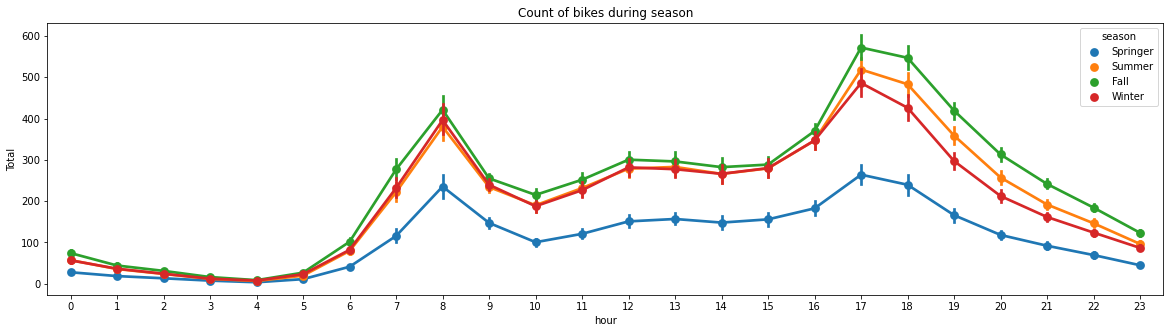

In [39]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour_df, x='hour', y='Total', hue='season', ax=ax)
ax.set(title='Count of bikes during season')

Berdasarkan visualisasi diatas dapat dilihat bahwa jumlah rental terbanyak terdapat pada musim gugur pada jam 17.00. Pada musim lainnya pun, jumlah rental terbanyak juga terdapat pada jam 17.00. Sedangkan jumlah rental terlihat ada penurunan ketika menjelang tengah malam hingga pagi hari.

### Pertanyaan 2: Bagaimana performa tipe konsumen pada bike sharing berdasarkan hari?

In [40]:
ren_cas_df = hour_df.groupby("weekday").casual.sum().sort_values(ascending=False).reset_index()
ren_cas_df

,weekday,casual
0,Sunday,153852
1,Monday,140521
2,Saturday,78238
3,Tuesday,70784
4,Friday,61460
5,Wednesday,57843
6,Thursday,57319


In [41]:
ren_reg_df = hour_df.groupby("weekday").registered.sum().sort_values(ascending=False).reset_index()
ren_reg_df

,weekday,registered
0,Friday,423935
1,Thursday,415729
2,Wednesday,411266
3,Saturday,409552
4,Tuesday,384719
5,Sunday,323955
6,Monday,303506


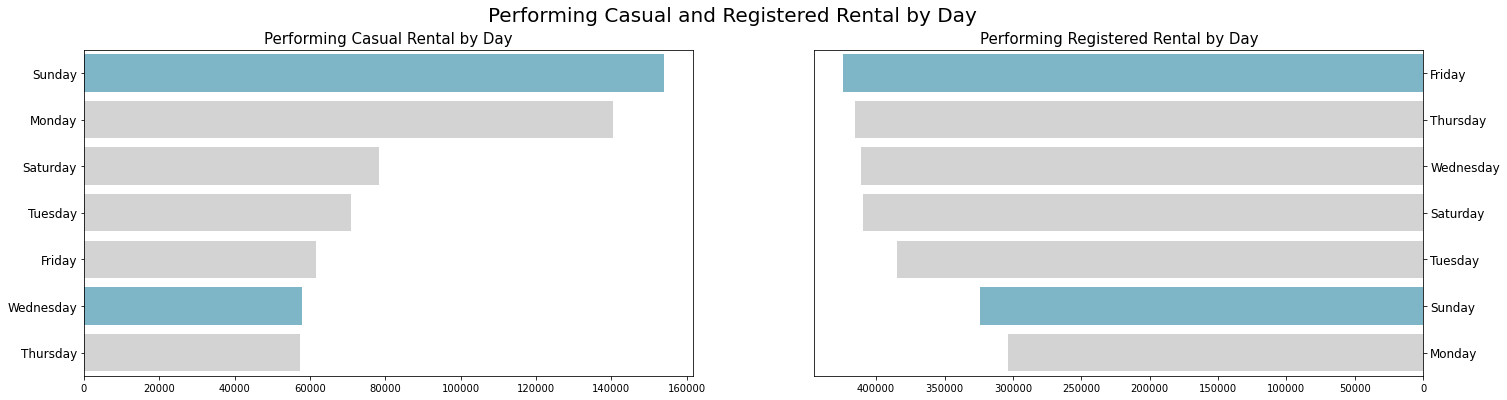

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="casual", y="weekday", data=ren_cas_df, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Performing Casual Rental by Day", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="registered", y="weekday", data=ren_reg_df, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Performing Registered Rental by Day", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Performing Casual and Registered Rental by Day", fontsize=20)
plt.show()

Berdasarkan visualisasi diatas dapat dilihat bahwa rental pada casual user terbanyak pada hari minggu, sedangkan rental pada registered user terbanyak pada dari jumat. 

### Pertanyaan 3: Bagaimana performa bike sharing tiap bulan?

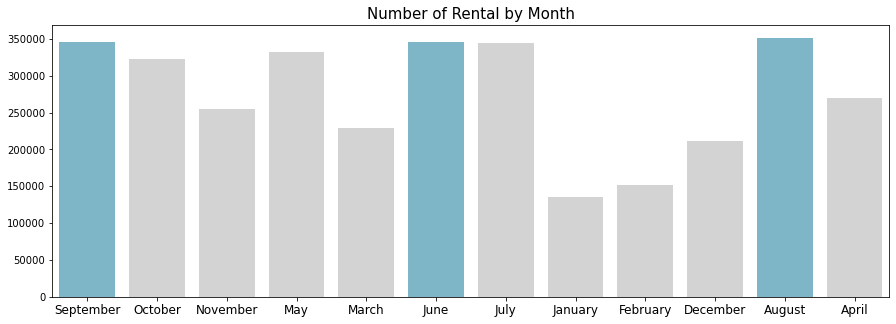

In [43]:
bymonth_df = hour_df.groupby("month").Total.sum().sort_values(ascending=False).reset_index()
 
plt.figure(figsize=(15, 5))
 
sns.barplot(
    y="Total", 
    x="month",
    data=bymonth_df.sort_values(by="month", ascending=False),
    palette=colors
)
plt.title("Number of Rental by Month", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan visualisasi diatas dapat diketahui bahwa rental terbanyak pada bulan September, Agustus, dan Juni.

### Pertanyaan 4: Bagaimana performa bike sharing berdasarkan cuaca?

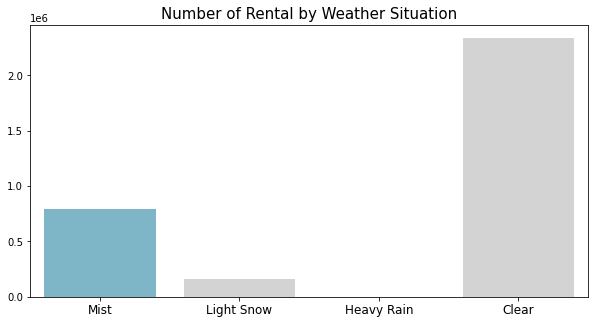

In [44]:
byweather_df = hour_df.groupby("weather_situation").Total.sum().sort_values(ascending=False).reset_index()
 
plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="Total", 
    x="weather_situation",
    data=byweather_df.sort_values(by="weather_situation", ascending=False),
    palette=colors
)
plt.title("Number of Rental by Weather Situation", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan visualisasi diatas, rental paling banyak pada cuaca cenderung cerah, Few clouds, Partly cloudy, Partly cloudy. 

## RFM Analysis

In [45]:
rfm_df = hour_df.groupby(by="hour", as_index=False).agg({
    "dteday": "max", # mengambil tanggal order terakhir
    "instant": "nunique", # menghitung jumlah order
    "Total": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["hour", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = hour_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,hour,frequency,monetary,recency
0,0,726,39130,0
1,1,724,24164,0
2,2,715,16352,0
3,3,697,8174,0
4,4,697,4428,0


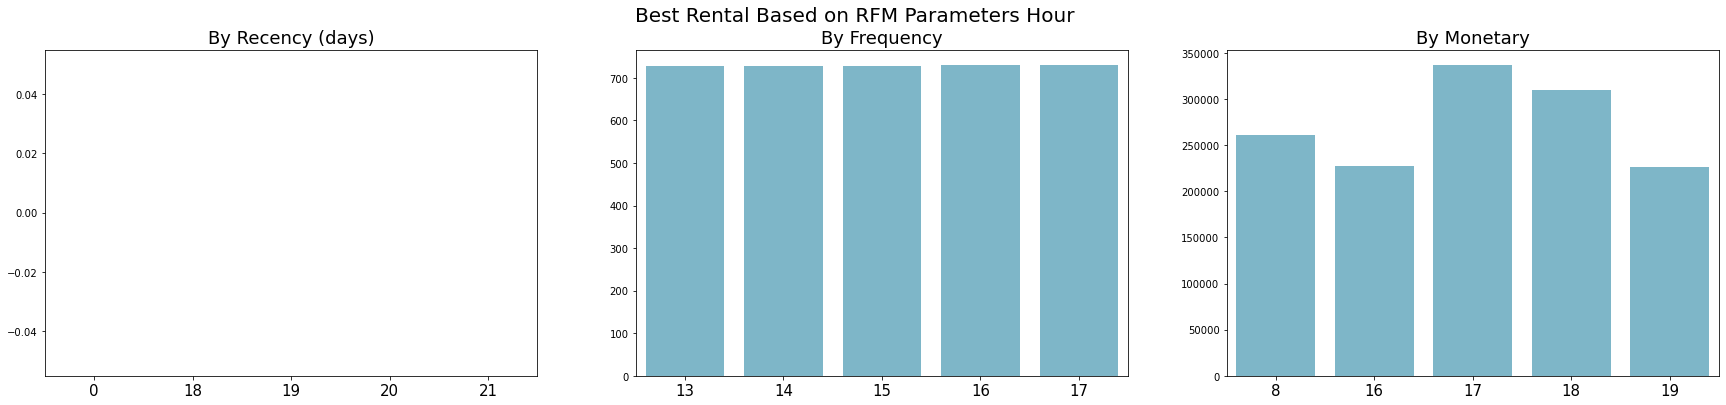

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="hour", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="hour", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="hour", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Rental Based on RFM Parameters Hour", fontsize=20)
plt.show()

## Conclusion

- Rental terbanyak pada musim gugur. 
- Tipe konsumen casual terbanyak pada hari minggu, sedangkan registered pada hari jumat.
- Bulan September merupakan bulan rental tertinggi.
- Mayoritas pada cuaca cerah banyak customer.

In [47]:
hour_df.to_csv("hour_data.csv", index=False)